# Data Analysis Validation Dataset

This Jupyter notebook performs an initial analysis of the validation dataset to assess whether the ranges and overall data structure align with those of the training dataset. The general structure of the training data serves as a reference for this analysis.

Table of Contents 
1. Setup & Imports
2. Initial Dataset Overview
3. Feature Engineering
4. Exploratory Data Analysis (EDA)
5. Anomaly Detection
6. Time Series Progression
7. Seasonal/Cyclic Time Series Analysis
8. Predictions


## Setup & Imports

In [2]:
from utils.constants import spectral_bands
from utils.data_loader import DataLoader
from utils.calculate_indices import CalculateIndices
from utils.basic_analysis import BasicDataAnalysis

from utils.time_series_aggregate import TimeSeriesAggregate
from utils.sits_outlier_cleaner import SITSOutlierCleaner
from utils.dimensionality_reduction import SITS_DimensionalityReduction
from utils.visualization_utils.visualization_histogram import HistogramDataVisualization
from utils.visualization_utils.visualization_spectral import SpectralBandPlotter
from utils.visualization_utils.visualization_time_series import (
    plot_date_diff_distribution,
)
from utils.visualization_utils.visualization_function import (
    plot_intervals_timestamps,
    plot_band_differences,
)
from utils.visualization_utils.visualization_anomaly_detection import (
    plot_with_outliers_subplot,
    plot_outlier_detection_grid,
)

### Load Dataset

In [4]:
dataloader = DataLoader()
df_base = dataloader.load_transform(
    "../data/validation/FINAL_Validierungs_Datensatz.csv"
)

## Initial Dataset Overview

In [5]:
basicanalysis = BasicDataAnalysis(df_base)
basicanalysis.get_dtypes()

time    datetime64[ns]
id               int64
doy            float64
b2             float64
b3             float64
b4             float64
b5             float64
b6             float64
b7             float64
b8             float64
b8a            float64
b11            float64
b12            float64
dtype: object

In [6]:
basicanalysis.show_overview()

Number of rows: 2103779
Number of columns: 13
Unique IDs: 15214
Earliest time: 2017-01-01 00:00:00
Latest time: 2022-11-02 00:00:00


In [7]:
basicanalysis.get_description()

,time,id,doy,b2,b3,b4,b5,b6,b7,b8,b8a,b11,b12
count,2103779,2.103779e+06,2.103779e+06,2.103779e+06,2.103779e+06,2.103779e+06,2.103779e+06,2.103779e+06,2.103779e+06,2.103779e+06,2.103779e+06,2.103779e+06,2.103779e+06
mean,2020-02-06 00:07:12.415001856,4.372667e+04,1.767351e+02,2.718160e+02,4.301442e+02,3.497250e+02,6.809936e+02,1.688485e+03,2.053620e+03,2.184340e+03,2.310793e+03,1.183501e+03,6.158863e+02
min,2017-01-01 00:00:00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2018-09-24 00:00:00,2.268500e+04,1.070000e+02,1.540000e+02,2.780000e+02,1.720000e+02,4.560000e+02,1.245000e+03,1.506000e+03,1.608000e+03,1.722000e+03,7.210000e+02,3.320000e+02
50%,2020-03-17 00:00:00,4.402100e+04,1.760000e+02,2.200000e+02,3.690000e+02,2.540000e+02,5.900000e+02,1.541000e+03,1.851000e+03,1.969000e+03,2.093000e+03,1.022000e+03,4.880000e+02
75%,2021-06-16 00:00:00,6.494200e+04,2.450000e+02,3.230000e+02,5.080000e+02,4.070000e+02,8.060000e+02,1.966000e+03,2.378000e+03,2.518000e+03,2.674000e+03,1.522000e+03,7.390000e+02
max,2022-11-02 00:00:00,8.399600e+04,3.660000e+02,1.941700e+04,1.946500e+04,1.974500e+04,1.486600e+04,2.214800e+04,2.316300e+04,2.874600e+04,2.572800e+04,1.311400e+04,1.301400e+04
std,NaN,2.425574e+04,8.486743e+01,2.126221e+02,2.534779e+02,3.083137e+02,3.487431e+02,6.616222e+02,8.303636e+02,8.846745e+02,8.907473e+02,6.344393e+02,4.310426e+02


In [8]:
basicanalysis.get_missing_counts()

,column_name,missing_count
0,time,0
1,id,0
2,doy,0
3,b2,0
4,b3,0
5,b4,0
6,b5,0
7,b6,0
8,b7,0
9,b8,0


## Feature Engieneering

### Basic Feature Engineering

In [9]:
df = dataloader.feature_extraction(df_base)

### Datetime Feature Engineering

In [10]:
df = dataloader.date_feature_extraction(df)

### Advanced Feature Engineering

In [11]:
calcindices = CalculateIndices()
df = calcindices.run(df)

## Exploratory Data Analysis (EDA)

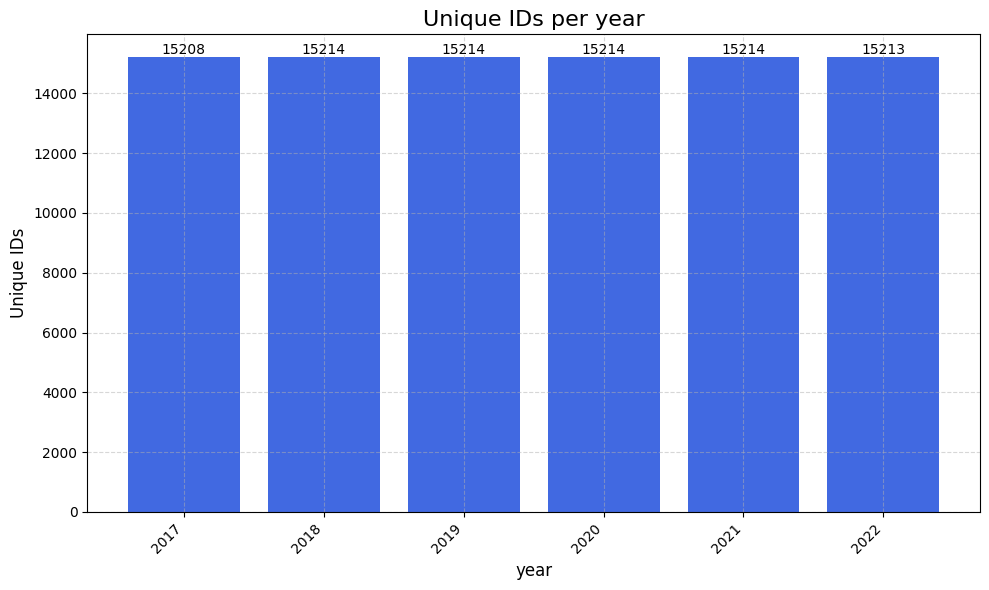

In [12]:
hist = HistogramDataVisualization(df)
hist.plot_unique_ids("year")

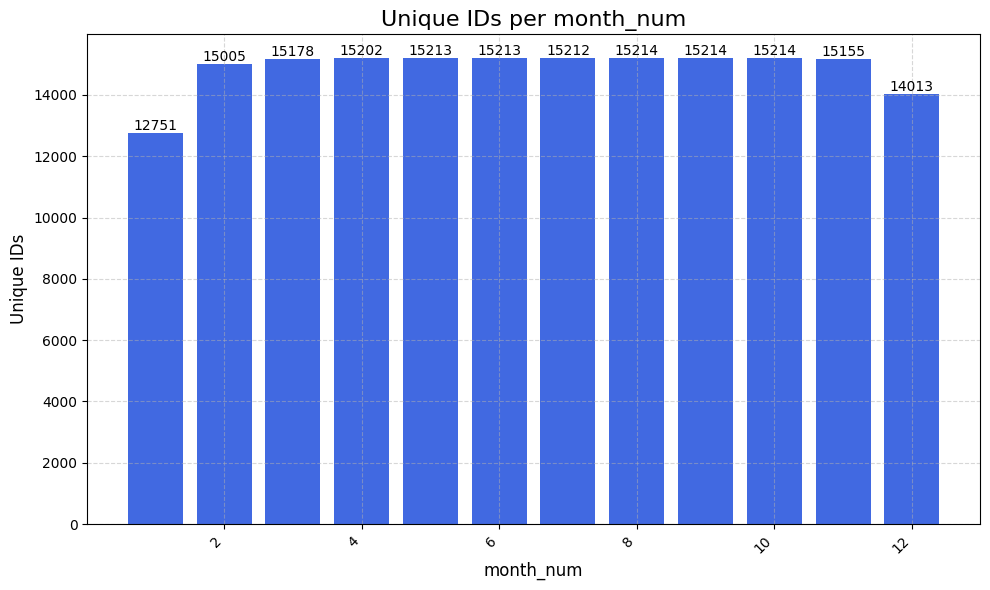

In [13]:
hist.plot_unique_ids("month_num")

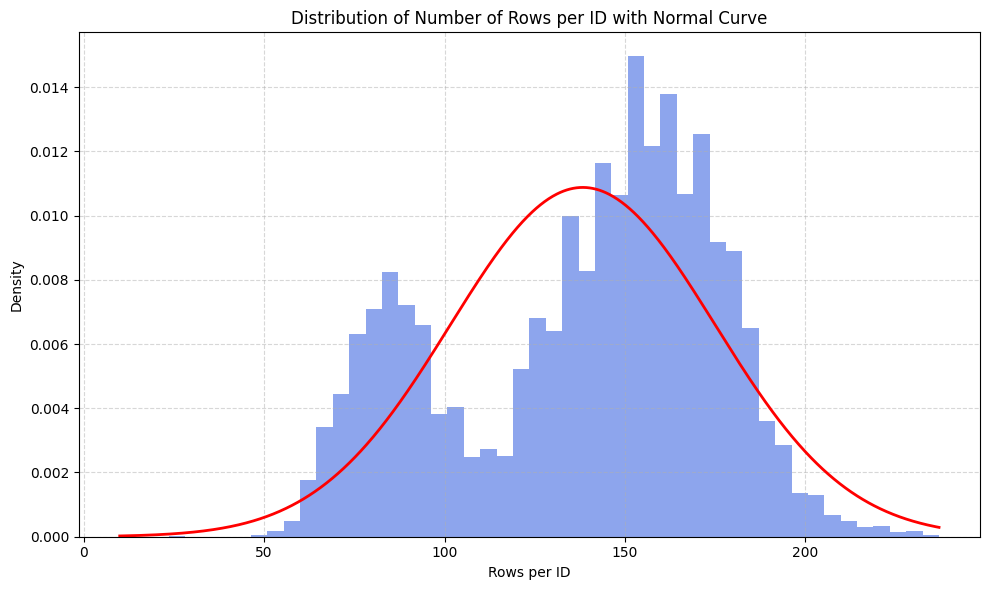

In [14]:
hist.plot_id_distribution()

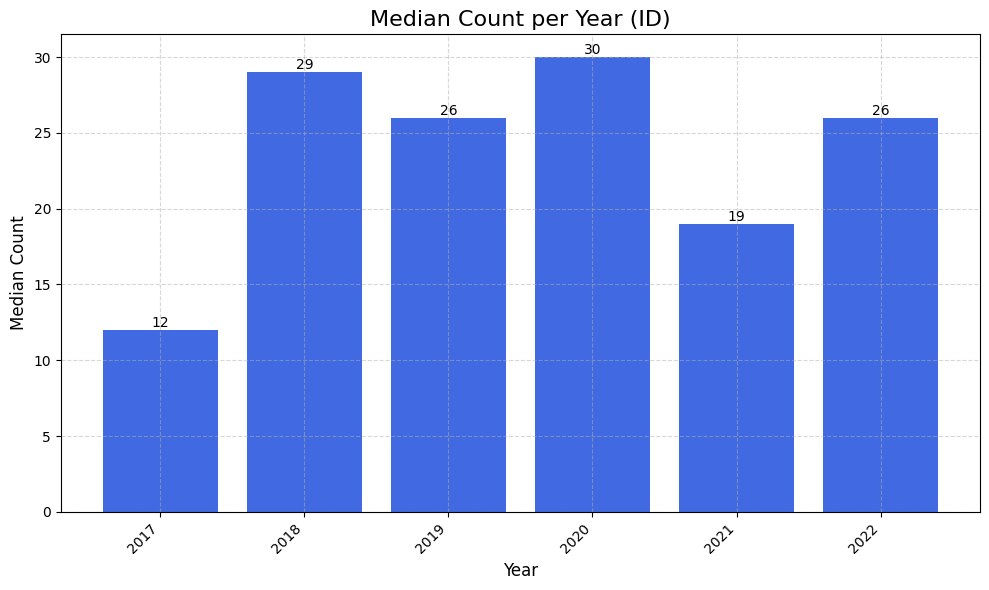

In [15]:
hist.plot_median_id_distribution()

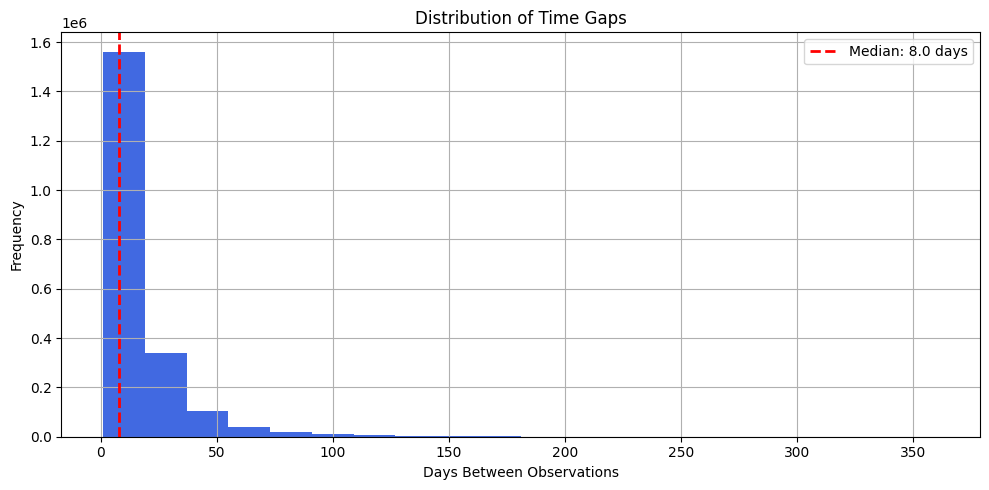

In [16]:
plot_date_diff_distribution(df)

## Anomaly Detection

Processing IDs: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


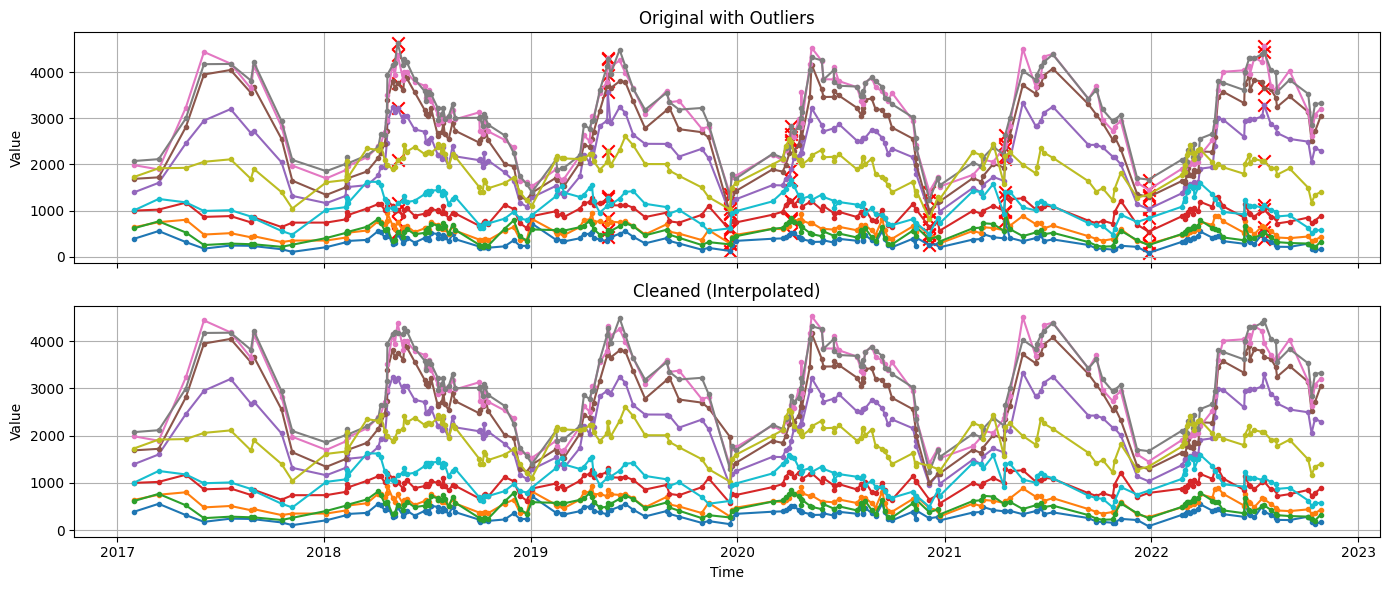

In [17]:
id_df = df[df["id"] == 12143]
cleaner = SITSOutlierCleaner(contamination=0.005)
cleaner.fit_transform(id_df, band_columns=spectral_bands)
df_with_any_flag = cleaner.add_any_outlier_flag()
plot_with_outliers_subplot(df_with_any_flag, spectral_bands)

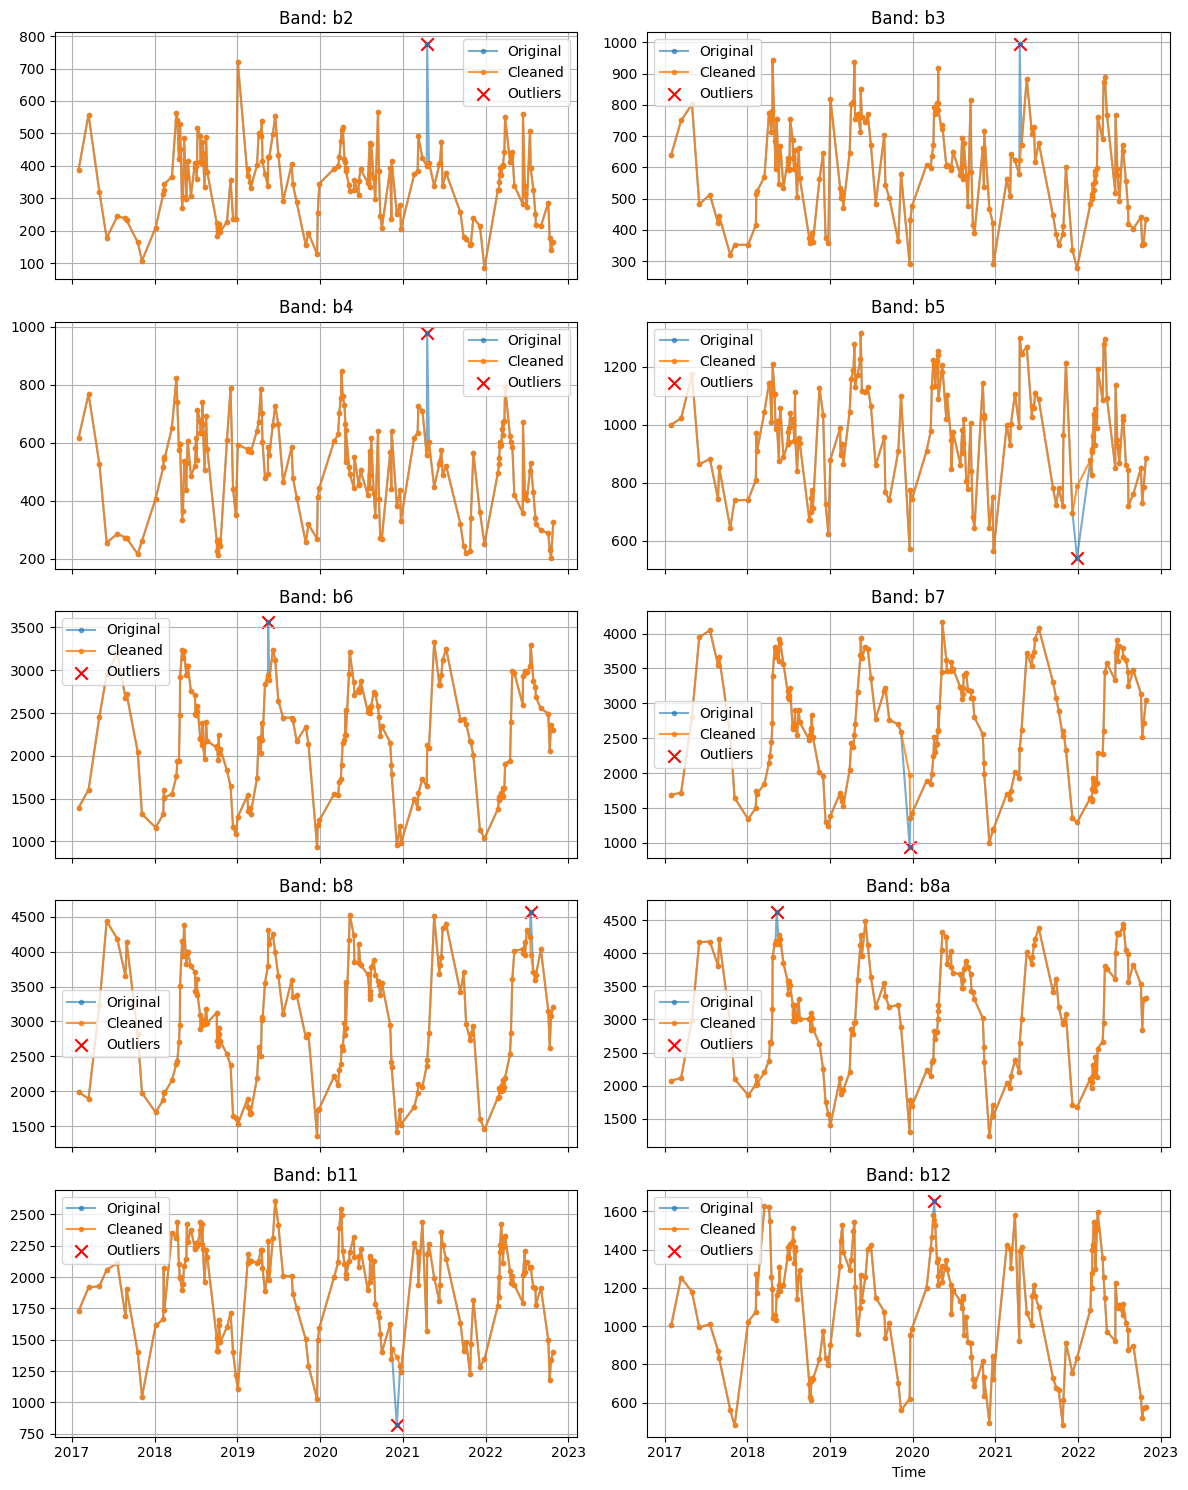

In [18]:
plot_outlier_detection_grid(df_with_any_flag, bands=spectral_bands)

In [19]:
score = cleaner.remaining_outliers_ratio()
print(f"Remaining outlier ratio (IsolationForest): {score:.2%}")

ratio = cleaner.zscore_outlier_ratio()
print(f"Outlier ratio (Z-Score method): {ratio:.2%}")

Remaining outlier ratio (IsolationForest): 5.00%
Outlier ratio (Z-Score method): 0.62%


<div class="alert-info">

</div>

## Time Series Progression

In [20]:
cleaned_id_df = cleaner.get_interpolated_only()
ts_agg = TimeSeriesAggregate(cleaned_id_df)
df_2w = ts_agg.aggregate_timeseries(freq="2W", method="mean")
dataloader = DataLoader()
df_2w_agg = dataloader.date_feature_extraction(df_2w)

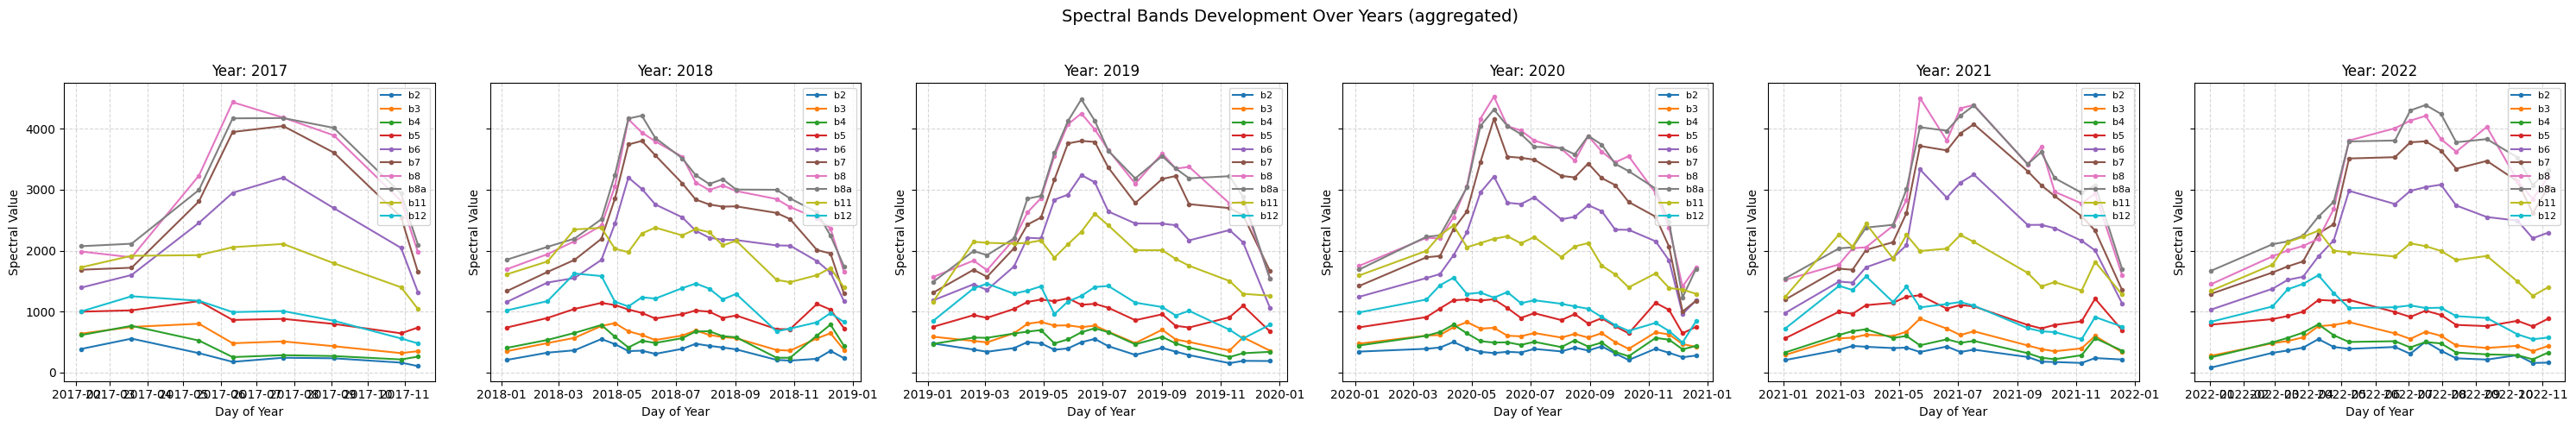

In [21]:
spectral = SpectralBandPlotter(df_2w_agg)
spectral.plot_spectral_development_over_years(addition="aggregated")

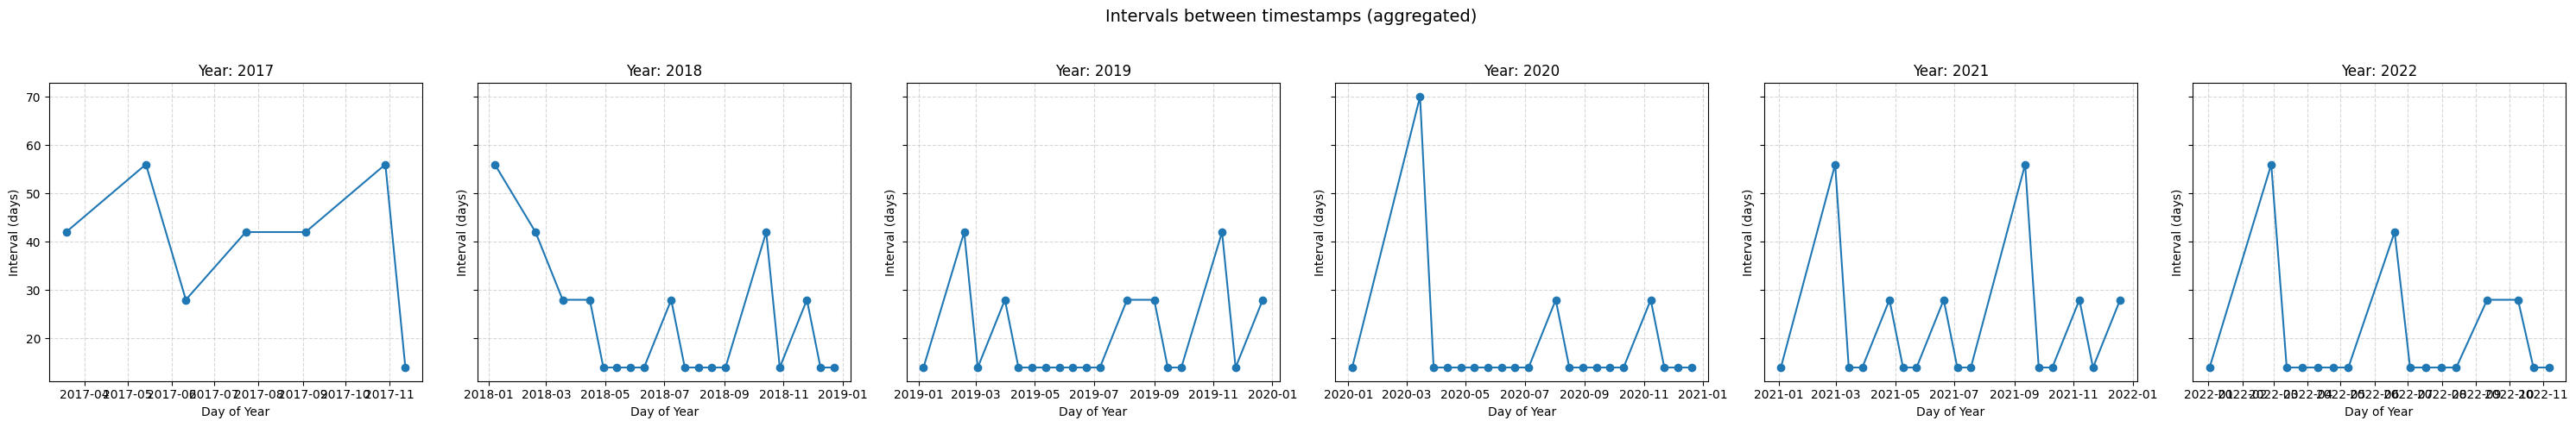

In [22]:
plot_intervals_timestamps(df_2w_agg, addition="aggregated")

## Seasonal/Cyclic Time Series Analysis

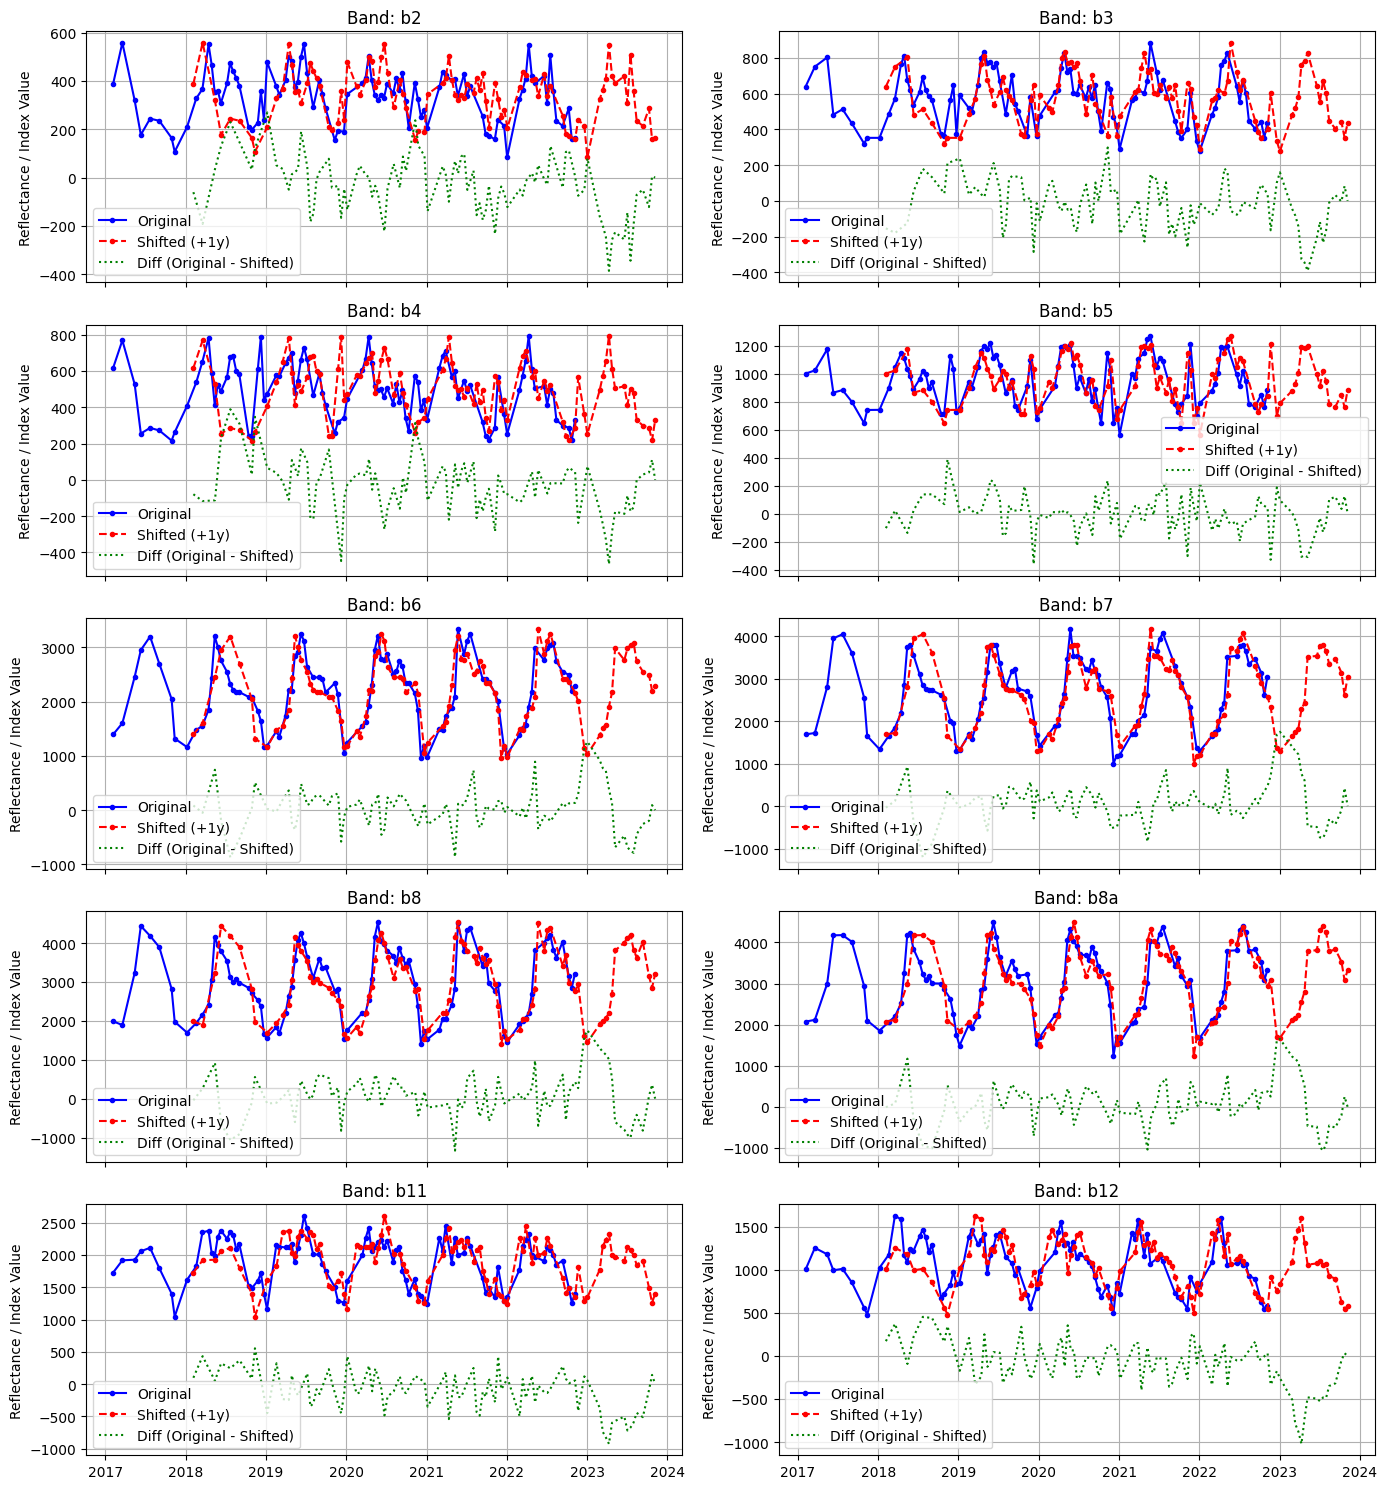

In [23]:
plot_band_differences(df_2w_agg, shift_years=1)

## Predictions

In [3]:
dataloader = DataLoader()
df_base = dataloader.load_transform(
    "../data/val/val_predictions.csv"
)
df_base

,time,id,b2,b3,b4,b5,b6,b7,b8,b8a,...,rendvi,month_num,year,season,biweek_of_year,biweek_sin,biweek_cos,date_diff,is_growing_season,predicted_species
0,2016-12-26,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,12.0,2016.0,1.0,27.0,0.239316,0.970942,0.0,0.0,soil
1,2017-01-09,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,2017.0,1.0,2.0,0.464723,0.885456,14.0,0.0,soil
2,2017-01-23,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,2017.0,1.0,3.0,0.663123,0.748511,14.0,0.0,soil
3,2017-02-06,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.0,2017.0,1.0,4.0,0.822984,0.568065,14.0,0.0,soil
4,2017-02-20,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.0,2017.0,1.0,5.0,0.935016,0.354605,14.0,0.0,soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342951,2022-09-12,83996,113.250000,218.833333,123.416667,340.333333,1180.583333,1605.000000,1702.583333,1706.416667,...,0.650103,9.0,2022.0,4.0,19.0,-0.992709,-0.120537,14.0,1.0,Norway_spruce_mixed
2342952,2022-09-26,83996,89.250000,181.000000,97.750000,291.000000,1066.250000,1486.500000,1524.750000,1568.250000,...,0.672574,9.0,2022.0,4.0,20.0,-0.992709,0.120537,14.0,1.0,Norway_spruce_mixed
2342953,2022-10-10,83996,77.250000,156.000000,75.916667,260.500000,986.416667,1324.333333,1346.416667,1470.750000,...,0.671259,10.0,2022.0,4.0,21.0,-0.935016,0.354605,14.0,1.0,Norway_spruce_mixed
2342954,2022-10-24,83996,86.500000,149.333333,72.333333,253.166667,902.333333,1243.500000,1249.166667,1408.000000,...,0.661693,10.0,2022.0,4.0,22.0,-0.822984,0.568065,14.0,1.0,Norway_spruce_mixed


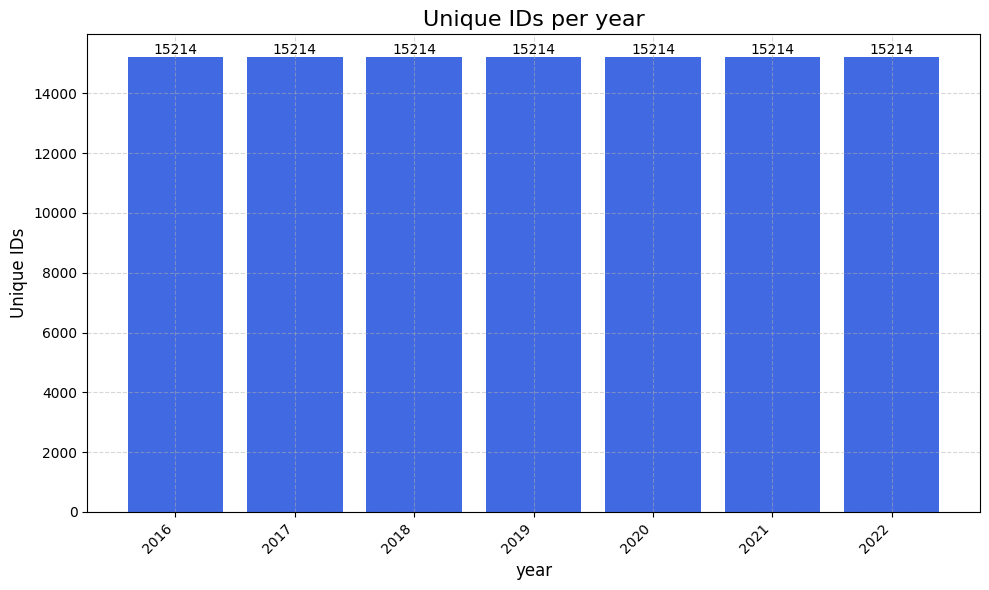

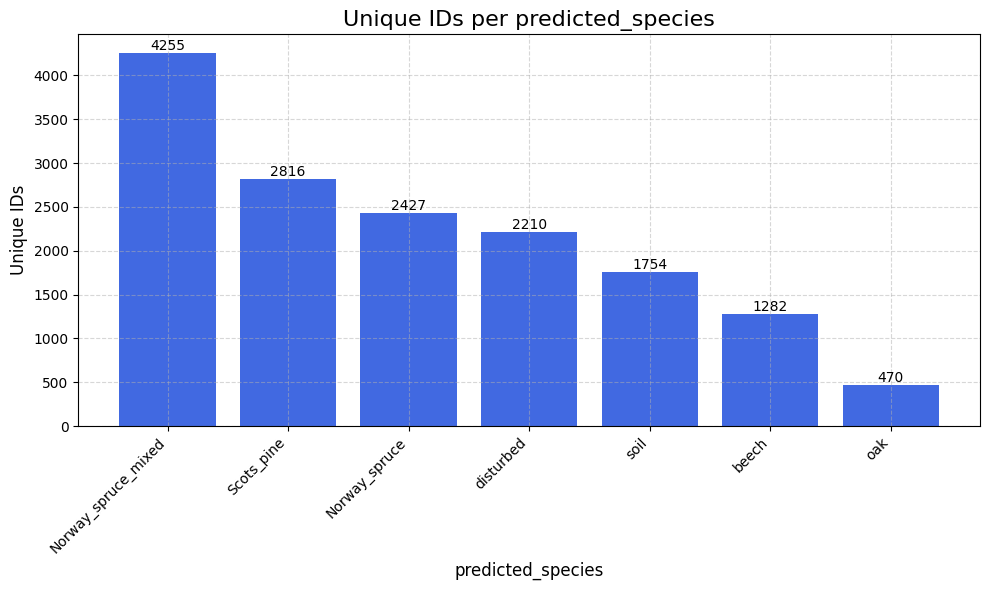

In [4]:
hist = HistogramDataVisualization(df_base)
hist.plot_unique_ids("year")
hist.plot_unique_ids("predicted_species")

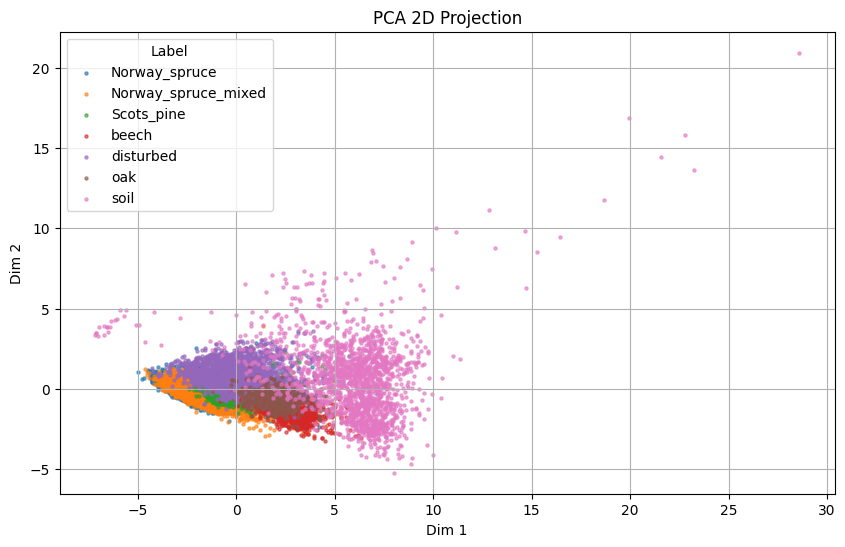

In [5]:
dr = SITS_DimensionalityReduction(method="PCA", n_components=3)
dr.fit(df_base, label_col="predicted_species")
dr.plot_2d()

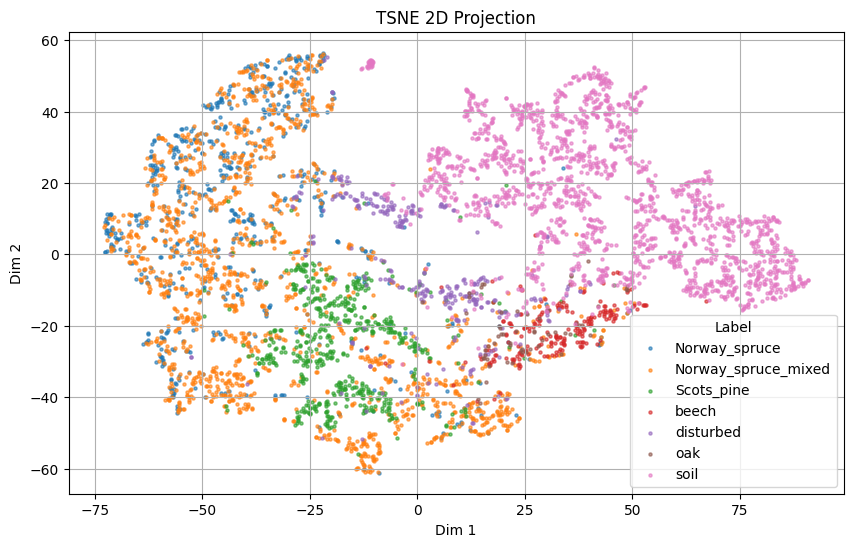

In [6]:
df_sample = dataloader.get_sample(df_base, n_ids=5000)
dr_tsne = SITS_DimensionalityReduction(method="tSNE", n_components=2)
dr_tsne.fit(df_sample, label_col="predicted_species")
dr_tsne.plot_2d()